<a href="https://colab.research.google.com/github/pchamio/Data-Analyst-Exercise/blob/main/Data_Analyst_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analyst Exercise


Import all the libraries

In [1]:
# import
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import mean_absolute_error
import requests
from bs4 import BeautifulSoup

Load the given data

In [2]:
# load movies_budgets data
movies_budgets = pd.read_csv('movies_budgets.csv')
movies_budgets.rename(columns={'Unnamed: 0':'ID'},inplace=True)
movies_budgets.head()

,ID,movie,budget,num_employees,time_minute,year,num_actors
0,0,Joker,1.252633e+07,62,122,2019,13
1,1,Parasite,9.034395e+07,80,132,2019,5
2,2,Knives Out,4.833149e+07,50,130,2019,12
3,3,Once Upon a Time... in Hollywood,5.024064e+07,89,161,2019,16
4,4,The Gentlemen,6.649767e+06,94,113,2019,9


In [3]:
# load movies_scores data
movies_scores = pd.read_csv('movies_scores.csv')
movies_scores.rename(columns={'Unnamed: 0':'ID'},inplace=True)
movies_scores.head()

,ID,movie,time_minute,year,vote,grade,directors
0,0,Joker,122,2019,808270,2.683119,168
1,1,Parasite,132,2019,426750,8.495495,527
2,2,Knives Out,130,2019,319809,6.045874,493
3,3,Once Upon a Time... in Hollywood,161,2019,478002,6.211508,534
4,4,The Gentlemen,113,2019,146955,1.742737,299


Explore dataset

In [4]:
movies_budgets.describe()

,ID,budget,num_employees,time_minute,year,num_actors
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,4.418983e+07,69.928000,122.250000,1991.013000,11.935000
std,288.819436,2.214552e+07,28.400059,27.871856,23.059587,4.434009
min,0.000000,3.439503e+05,20.000000,45.000000,1920.000000,5.000000
25%,249.750000,2.933318e+07,47.000000,102.000000,1976.000000,8.000000
50%,499.500000,4.152462e+07,69.000000,119.000000,1998.500000,12.000000
75%,749.250000,5.615621e+07,95.000000,136.000000,2009.000000,16.000000
max,999.000000,1.058777e+08,119.000000,321.000000,2019.000000,19.000000


In [5]:
movies_scores.describe()

,ID,time_minute,year,vote,grade,directors
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,499.500000,122.250000,1991.013000,2.659911e+05,5.475654,269.067000
std,288.819436,27.871856,23.059587,3.144706e+05,1.724042,158.129363
min,0.000000,45.000000,1920.000000,2.518200e+04,0.014822,0.000000
25%,249.750000,102.000000,1976.000000,5.442525e+04,4.474390,134.000000
50%,499.500000,119.000000,1998.500000,1.368875e+05,5.500000,268.000000
75%,749.250000,136.000000,2009.000000,3.631140e+05,6.547221,401.250000
max,999.000000,321.000000,2019.000000,2.250445e+06,9.244838,549.000000


Both dataset have the same number of rows and id which expected to be unique. The column 'time_minute' and 'year' are also identical. It can be said that we can combine these two dataset with the three identical column: id, time_minute and year.

In [6]:
# merge two dataset
df_final = movies_budgets.merge(movies_scores, how='inner', left_on=['ID','movie','time_minute','year'], right_on=['ID','movie','time_minute','year'])
df_final.head()

,ID,movie,budget,num_employees,time_minute,year,num_actors,vote,grade,directors
0,0,Joker,1.252633e+07,62,122,2019,13,808270,2.683119,168
1,1,Parasite,9.034395e+07,80,132,2019,5,426750,8.495495,527
2,2,Knives Out,4.833149e+07,50,130,2019,12,319809,6.045874,493
3,3,Once Upon a Time... in Hollywood,5.024064e+07,89,161,2019,16,478002,6.211508,534
4,4,The Gentlemen,6.649767e+06,94,113,2019,9,146955,1.742737,299


Check again

In [7]:
df_final.describe()

,ID,budget,num_employees,time_minute,year,num_actors,vote,grade,directors
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,499.500000,4.418983e+07,69.928000,122.250000,1991.013000,11.935000,2.659911e+05,5.475654,269.067000
std,288.819436,2.214552e+07,28.400059,27.871856,23.059587,4.434009,3.144706e+05,1.724042,158.129363
min,0.000000,3.439503e+05,20.000000,45.000000,1920.000000,5.000000,2.518200e+04,0.014822,0.000000
25%,249.750000,2.933318e+07,47.000000,102.000000,1976.000000,8.000000,5.442525e+04,4.474390,134.000000
50%,499.500000,4.152462e+07,69.000000,119.000000,1998.500000,12.000000,1.368875e+05,5.500000,268.000000
75%,749.250000,5.615621e+07,95.000000,136.000000,2009.000000,16.000000,3.631140e+05,6.547221,401.250000
max,999.000000,1.058777e+08,119.000000,321.000000,2019.000000,19.000000,2.250445e+06,9.244838,549.000000


## 1. Quality of movies per time window

a. Which year was the year with the best movies (taking all movies into account that year).


> Assuming a highest grade represents the best year for movies. As there are several movies in a year, averaging movies grade of the year represents the quality of the movies in a year.



In [8]:
# create dataframe for the average grade of each year
df_q1_a = df_final.groupby(['year']).agg({'grade': 'mean'}).sort_values(['grade'],ascending=False).reset_index()
print('The Quality of the movies each year are as in the following table:')
df_q1_a.head()

The Quality of the movies each year are as in the following table:


,year,grade
0,1941,8.870166
1,1936,8.495495
2,1943,8.128815
3,1942,7.981056
4,1930,7.589008


In [9]:
# select the year with the highest grade
q1_a = df_q1_a.head(1)['year'][0]
print('The',q1_a,'was the year with the best movies.')

The 1941 was the year with the best movies.


b. Please provide a sorted list of all the years by their quality and top 5.


> Sort the year according to the average quality (grade) from the highest to the lowest. Then show the top 5 movies of each year.

Note that some of the year have less than 5 movies in the dataset.



In [10]:
# create dataframe with sorted average grade of the year
df_q1_b = df_final.groupby(['year']).agg({'grade': 'mean'}).sort_values(['grade'],ascending=False).reset_index()
# find the unique sorted year 
year = df_q1_b['year'].unique()

# create dataframe of top 5 of each year
top_5 = df_final.groupby('year').apply(lambda x: x.sort_values(by='grade',ascending=False).head(5)).reset_index(drop=True)

# create dict to keep sorted year and top5
top5 = defaultdict(list)
# add both year and top 5
for i in range(len(year)):
  for j in range(len(top_5)):
    if year[i] == top_5['year'][j]:
      top5[year[i]].append(top_5['movie'][j])

In [11]:
# create dataframe of sorted year and top5
df_top5 = pd.DataFrame(top5.items(), columns=['Year', 'Top 5 Movies'])
# remove [] from each year of top5 column
df_top5['Top 5 Movies'] = df_top5['Top 5 Movies'].str.join(',')
q1_b = df_top5 
q1_b

,Year,Top 5 Movies
0,1941,"Citizen Kane,The Maltese Falcon"
1,1936,Modern Times
2,1943,Shadow of a Doubt
3,1942,"Casablanca,To Be or Not to Be"
4,1930,All Quiet on the Western Front
...,...,...
93,1987,"Withnail & I,The Untouchables,Wings of Desire,..."
94,1997,"L.A. Confidential,Boogie Nights,Knockin' on He..."
95,2004,"The Incredibles,Before Sunset,Eternal Sunshine..."
96,2003,"The Lord of the Rings: The Return of the King,..."


c. Which decade was the best?


> create a decade column then find the higest average grade for each decade which is the best.



In [12]:
# create decade column
df_final['decade'] = np.ceil(df_final['year']/10)
# highest average grade of the decade 
q1_c = df_final.groupby(['decade']).agg({'grade': 'mean'}).sort_values(['grade'],ascending=False).head(1).reset_index()['decade'][0]
print('The decade with the best movie was in',q1_c)

The decade with the best movie was in 194.0


## 2. Directors

a. Find top 5 directors who directed the best quality movies (by their movie grades).

In [13]:
# create dataframe for highest grade for each director and choose only 5
df_q2_a = df_final.groupby(['directors']).agg({'grade': 'max'}).sort_values(['grade'],ascending=False).head(5).reset_index()
# make into list
q2_a = list(df_q2_a['directors'][0:])
print('The top 5 directors who directed the best quality movies are',*q2_a, sep=' ')

The top 5 directors who directed the best quality movies are 17 124 392 6 395


The top 5 directors in dataframe

In [14]:
top5_directors = df_q2_a[['directors']]
top5_directors

,directors
0,17
1,124
2,392
3,6
4,395


The average grade of all movies is

In [15]:
grade_mean = df_final['grade'].mean()
grade_mean

5.475653883764269

b. Choose 2 or 3 of them as options that you would recommend to work with, why 

---

did you choose those?

In [16]:
# see the overall performance of director and select the minnimun grade of the movie
q2_b = df_final.groupby(['directors']).agg({'grade': ['max','mean','min']})['grade'][['min']].reset_index()
# select top 3 directors whose minimum grade movie never lower than the grade average of all movies in the industry   
q2_b = q2_b[q2_b['min'] > grade_mean].merge(top5_directors, how='inner', left_on=['directors'], right_on=['directors'])
q2_b

,directors,min
0,17,9.244838
1,124,8.495495
2,395,5.558019


I would recommend the directors 17, 124 and 395 as three of them never produce movies that is lower than average grade and their minimum grade is also higher while the rest two directors have lower than average garde movies.

## 3. Budget and profits

Load the budget table.

In general, would you say a lot of employees correlate significantly to more expensive (cost of creating a movie = budget) movies (no need for deep analysis, just an explanation/graph would be enough).


In [17]:
df_final.head()

,ID,movie,budget,num_employees,time_minute,year,num_actors,vote,grade,directors,decade
0,0,Joker,1.252633e+07,62,122,2019,13,808270,2.683119,168,202.0
1,1,Parasite,9.034395e+07,80,132,2019,5,426750,8.495495,527,202.0
2,2,Knives Out,4.833149e+07,50,130,2019,12,319809,6.045874,493,202.0
3,3,Once Upon a Time... in Hollywood,5.024064e+07,89,161,2019,16,478002,6.211508,534,202.0
4,4,The Gentlemen,6.649767e+06,94,113,2019,9,146955,1.742737,299,202.0


**Relationship between number of employee and budget**

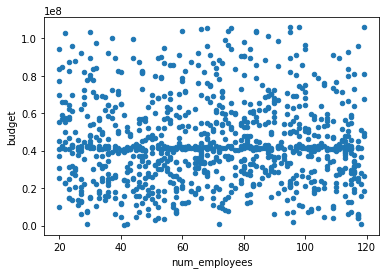

In [18]:
# Scatterplot
df_final.plot.scatter('num_employees','budget')

> In general the more number of employee might lead to higher cost, however, acording to the scatter, the lower number of employee could also lead to higher cost. There is no obvious trend(strong relation) between number of employee and cost, but there is a trend on the straight line that the budget is around 0.4 for most of the movies, while the number of employee varies across the dataset.


**Employee and budget distribution**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


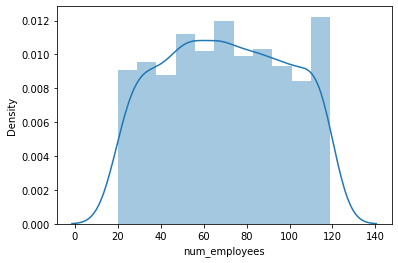

In [19]:
# Histogram
sns.distplot(df_final['num_employees']) 
plt.show()

The number of employee distributed equally.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


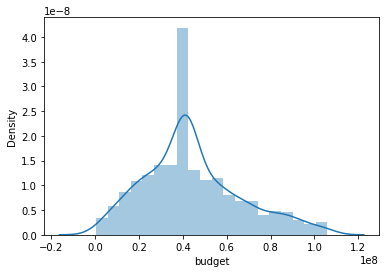

In [20]:
sns.distplot(df_final['budget']) 
plt.show()

There is a peak thhat most of the movies use budget at 0.4. We can see this as the minimum budget needed for a movie.

Assuming it is possible to create a movie with an imaginary grade of 12, how much would it cost to create such a movie? (here you should learn from the existing data).

After inspecting data, starting building a model to predict the cost by splitting data into two sets: training set and testing set

In [21]:
# build linear regression to predict movie grade 12
# predictor X
X = np.array([[x] for x in df_final['grade'].values])
# Y
y = np.array([[x] for x in df_final['budget'].values])
# split the data into training/testing sets
X_train = X[:-20]
X_test = X[-20:]

# split the targets into training/testing sets
y_train = y[:-20]
y_test = y[-20:]

# summarize the shape of the training dataset
print(X_train.shape, y_train.shape)

(980, 1) (980, 1)


Train to model using training set and plot the trained model

Coefficients: 
 [[12426984.06775073]]
Mean squared error: 8273603113972.23
Coefficient of determination(R^2): 0.96


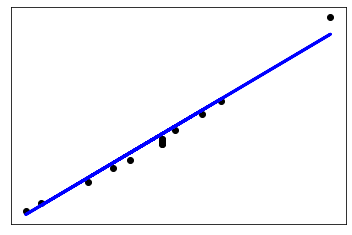

In [22]:
# create linear regression object
regr = linear_model.LinearRegression()

# train the model using the training sets
regr.fit(X_train, y_train)

# make predictions using the testing set
y_pred = regr.predict(X_test)

# the coefficients
print('Coefficients: \n', regr.coef_)
# the mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# the coefficient of determination(R-square): 1 is perfect prediction 
print('Coefficient of determination(R^2): %.2f'
      % r2_score(y_test, y_pred))

# plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

As you can see from the graph, the data fall around the line and the R square is high representing the good fit. However, the MSE (mean square error) is quite high and we should reduce it.

Let see the train dataset in the plot below.

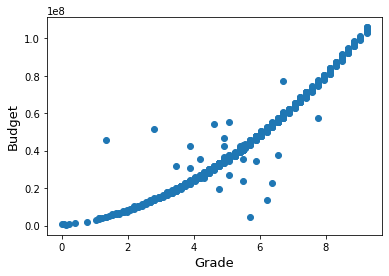

In [23]:
fig, ax = plt.subplots()
ax.scatter(x = X_train, y = y_train)
plt.ylabel('Budget', fontsize=13)
plt.xlabel('Grade', fontsize=13)
plt.show()

From the plot, you can see that there are a few datapoint scatter from the line which could be an outlier. So detect and get rid of the outlier to try this model again.

In [24]:
# identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)

(923, 1) (923, 1)


Coefficients: 
 [[12650242.02452242]]
Mean squared error: 7435613020117.78
Coefficient of determination(R^2): 0.96


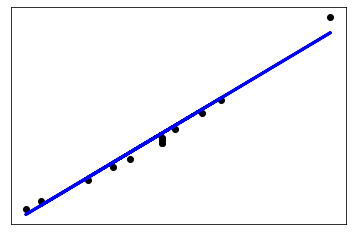

In [25]:
# create linear regression object
regr = linear_model.LinearRegression()

# train the model using the training sets
regr.fit(X_train, y_train)

# make predictions using the testing set
y_pred = regr.predict(X_test)

# the coefficients
print('Coefficients: \n', regr.coef_)
# the mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# the coefficient of determination(R-square): 1 is perfect prediction 
print('Coefficient of determination(R^2): %.2f'
      % r2_score(y_test, y_pred))

# plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

The MSE reduce and the R square is high so this could approximately be a good model.

Now we can use the modle to predict the budget for movie grade 12.

In [26]:
# suppose we want to predict movie grade 12
grade = 12

# the predicted cost of movie
grade12_cost = regr.predict(np.array([[grade]]))[0].item()
grade12_cost

126591338.15692404

Assuming grades determine the income (amount of sales/revenue) from a movie by the following function: a0 = -300000 a1 = 3500000 a2 = 900000



```
income = a0 + a1 * grades + a2 * grade^2
```



What budget would you choose to make a movie if you want investors to be happy? (assuming investors care about profit, profit)

In [27]:
# assuming income for a movie follow this formula with the following parameter
a0 = -300000
a1 = 3500000
a2 = 900000

# predicted income
income = a0 + a1 * grade + a2 * grade**2
income

171300000

The predicted profit for grade 12 movie

In [28]:
profit = income - grade12_cost 
profit

44708661.84307596

The expected profit is positive as the expected income of grade 12 movie is higher than cost(budget). We can choose the budget 10% higher than the expected one to control uncertain circumstance and return the rest of the budget incase there are some left to make investor happy.

# Data Engineering - Bonus Exercise 

In [29]:
# get url
url = "http://www.imdb.com/chart/top"
response = requests.get(url).content
soup = BeautifulSoup(response, 'html.parser')
# print(soup.prettify())

In [30]:
# scrap all together
movie_id = []
movie_title = []
years = []
directors = []

movie_class = soup.find_all('td', class_='titleColumn')
for movie in movie_class:
  # scrap id, movie title, year, director
  id = movie.find('a').previousSibling.replace('\n','').replace('.','').strip()
  moviename = movie.find('a').get_text()
  year = movie.find('span').get_text().replace('(','').replace(')','')
  director = movie.find('a').get('title').split(',')[0].replace('(dir.)','').strip()
  
  # add each data to list
  movie_id.append(id)    
  movie_title.append(moviename)  
  years.append(year)
  directors.append(director)

# scrap rating
ratings = soup.find_all('td', class_ = 'ratingColumn imdbRating')
ratings
movie_rating = []
for rating in ratings:
  r = rating.find('strong').get_text()
  r = float(r)
  movie_rating.append(r)

In [31]:
# put everything together
column_list=['Movie ID','Movie title' ,'Year' ,'Director' ,
'Movie rating']
df = pd.DataFrame(columns=column_list)
movie_dict={
        'Movie ID':movie_id,
        'Movie title' : movie_title,
        'Year' : years,
        'Director' : directors,
        'Movie rating' : movie_rating,
        }
# create dataframe
df = pd.DataFrame({ key: pd.Series(val) for key, val in movie_dict.items() })
df

,Movie ID,Movie title,Year,Director,Movie rating
0,1,The Shawshank Redemption,1994,Frank Darabont,9.2
1,2,The Godfather,1972,Francis Ford Coppola,9.1
2,3,The Godfather: Part II,1974,Francis Ford Coppola,9.0
3,4,The Dark Knight,2008,Christopher Nolan,9.0
4,5,12 Angry Men,1957,Sidney Lumet,8.9
...,...,...,...,...,...
245,246,Fanny and Alexander,1982,Ingmar Bergman,8.0
246,247,The Princess Bride,1987,Rob Reiner,8.0
247,248,Soul,2020,Pete Docter,8.0
248,249,Nights of Cabiria,1957,Federico Fellini,8.0


In [32]:
# create unique director id
df['director_id'] = df['Director'].map(hash)
df

,Movie ID,Movie title,Year,Director,Movie rating,director_id
0,1,The Shawshank Redemption,1994,Frank Darabont,9.2,-5736128688911018851
1,2,The Godfather,1972,Francis Ford Coppola,9.1,-5057499341722760387
2,3,The Godfather: Part II,1974,Francis Ford Coppola,9.0,-5057499341722760387
3,4,The Dark Knight,2008,Christopher Nolan,9.0,8341916855202264478
4,5,12 Angry Men,1957,Sidney Lumet,8.9,-3682405262966271626
...,...,...,...,...,...,...
245,246,Fanny and Alexander,1982,Ingmar Bergman,8.0,-1726987230058069929
246,247,The Princess Bride,1987,Rob Reiner,8.0,-7811432821022492474
247,248,Soul,2020,Pete Docter,8.0,-1638071542206917529
248,249,Nights of Cabiria,1957,Federico Fellini,8.0,8597841117612720716


In [33]:
# director dataframe
df_directors = df[["director_id", "Director"]].drop_duplicates()
df_directors

,director_id,Director
0,-5736128688911018851,Frank Darabont
1,-5057499341722760387,Francis Ford Coppola
3,8341916855202264478,Christopher Nolan
4,-3682405262966271626,Sidney Lumet
5,521977289143686225,Steven Spielberg
...,...,...
242,4510730705609854820,Hideaki Anno
243,-5224451238411867456,Jeethu Joseph
244,-1125846958439298659,Krzysztof Kieslowski
248,8597841117612720716,Federico Fellini


In [34]:
# export to csv
df_directors.to_csv('directors.csv', index=False)

In [35]:
# movies dataframe
df_movies = df.drop('Director', axis=1)
df_movies

,Movie ID,Movie title,Year,Movie rating,director_id
0,1,The Shawshank Redemption,1994,9.2,-5736128688911018851
1,2,The Godfather,1972,9.1,-5057499341722760387
2,3,The Godfather: Part II,1974,9.0,-5057499341722760387
3,4,The Dark Knight,2008,9.0,8341916855202264478
4,5,12 Angry Men,1957,8.9,-3682405262966271626
...,...,...,...,...,...
245,246,Fanny and Alexander,1982,8.0,-1726987230058069929
246,247,The Princess Bride,1987,8.0,-7811432821022492474
247,248,Soul,2020,8.0,-1638071542206917529
248,249,Nights of Cabiria,1957,8.0,8597841117612720716


In [36]:
# export to csv
df_movies.to_csv('movies.csv', index=False)